In [19]:
import cv2
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [20]:
net = cv2.dnn.readNetFromTensorflow('data/frozen_inference_graph.pb',
                                     'data/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')

In [21]:
image = cv2.imread("images/horse/horse_7.jpg")

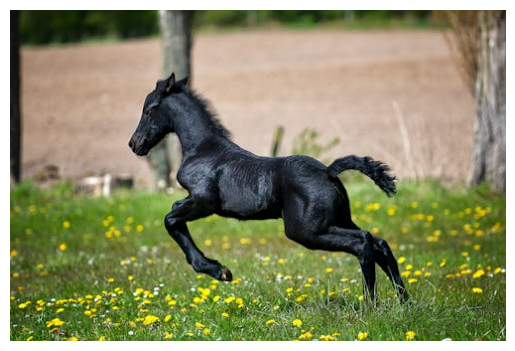

In [22]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [23]:
blob = cv2.dnn.blobFromImage(image,swapRB=True)

In [24]:
net.setInput(blob)

In [25]:
boxes, masks = net.forward(["detection_out_final", "detection_masks"])

In [26]:
detection_count = boxes.shape[2]

In [27]:
print(detection_count)
print(boxes.shape)

100
(1, 1, 100, 7)


In [28]:
def generate_distant_colors(n_colors, seed):
    sampler = qmc.Halton(d=3, scramble=True, seed=seed)
    sample = sampler.random(n_colors)
    return sample

In [29]:
with open ("data/coco.names", "r") as f:
    labels = [line.strip() for line in f.readlines()]

In [30]:
colors = generate_distant_colors(detection_count, 42)

In [31]:
res = image.copy()
count_detected = 0
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = box[1] -1
    score = box[2]
    if score > 0.8:
        count_detected += 1
        x = box[3]
        y = box[4]
        x2 = box[5]
        y2 = box[6]
        res = cv2.rectangle(res, (int(x * res.shape[1]), int(y * res.shape[0])),
                              (int(x2 * res.shape[1]), int(y2 * res.shape[0])), colors[count_detected]*255, 10)
        
        label = f"{labels[int(class_id)]}: {score:.2f}"
        cv2.putText(res, label, (int(x * res.shape[1]+ 10), int(y * res.shape[0] + 50)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 5)
        cv2.putText(res, label, (int(x * res.shape[1]+ 10), int(y * res.shape[0] + 50)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, colors[count_detected]*255, 2)
    

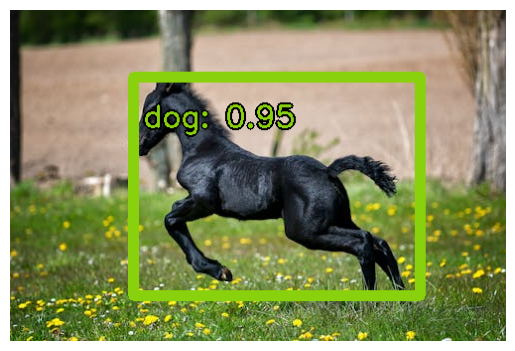

In [32]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()